This project illustrates how sentiment analysis can be utilized as a trading strategy.


In [1]:
import pandas as pd

df = pd.read_csv('data/news_bitcoin_2020-01-01_2022-12-31.csv', parse_dates=True, index_col='date').sort_index()
df=df[:'2023-01-01']
df

,Unnamed: 0,title,link
date,,,
2020-01-01 08:00:00+00:00,18,Worst Bitcoin Price Prediction of 2019,{'https://consent.google.com/articles/CBMiRWh0...
2020-01-01 08:00:00+00:00,30,Bitcoin: 4 Big Competitive Advantages Over Alt...,{'https://consent.google.com/articles/CBMiWWh0...
2020-01-01 08:00:00+00:00,38,"From crypto currency to chocolate, where to sp...",{'https://consent.google.com/articles/CBMiXGh0...
2020-01-01 08:00:00+00:00,53,"Bitcoin Price Will Crash Below $1k in 2020, Ze...",{'https://consent.google.com/articles/CBMiZGh0...
2020-01-03 08:00:00+00:00,47,Happy birthday Bitcoin! Celebrating the life o...,{'https://consent.google.com/articles/CBMiVWh0...
...,...,...,...
2022-12-29 08:00:00+00:00,66,Will This Country Be the Next to Make Bitcoin ...,{'https://consent.google.com/articles/CBMiW2h0...
2022-12-30 08:00:00+00:00,10,What Do Bitcoin Investors Need To Know In Thes...,{'https://consent.google.com/articles/CBMicGh0...
2022-12-30 08:00:00+00:00,14,Billionaire Mark Cuban Reveals When He’d Buy B...,{'https://consent.google.com/articles/CBMivgFo...


We use vaders sentiment analyser to score the cleaned article title. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

One of the biggest advantages of VADER is that it does not require any training data but is constructed from a generalizable, valence-based, human-curated gold standard sentiment lexicon.


In [3]:
from services.sentiment_analyser import SentimentAnalyser

sentiment_analyser = SentimentAnalyser()
# df = df[:10]
df = sentiment_analyser.get_sentiment_score(df)
df

2024-06-19 16:46:20 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-06-19 16:46:21 INFO: Downloaded file to /Users/danielgriffiths/stanza_resources/resources.json
2024-06-19 16:46:21 WARNING: Language en package default expects mwt, which has been added
2024-06-19 16:46:21 INFO: Loading these models for language: en (English):
| Processor | Package        |
------------------------------
| tokenize  | combined       |
| mwt       | combined       |
| sentiment | sstplus_charlm |

2024-06-19 16:46:21 INFO: Using device: cpu
2024-06-19 16:46:21 INFO: Loading: tokenize
2024-06-19 16:46:22 INFO: Loading: mwt
2024-06-19 16:46:22 INFO: Loading: sentiment
2024-06-19 16:46:23 INFO: Done loading processors!


,Unnamed: 0,title,link,title_normalized,vader_sentiment_score,textblob_sentiment_score
date,,,,,,
2020-01-01 08:00:00+00:00,18,Worst Bitcoin Price Prediction of 2019,{'https://consent.google.com/articles/CBMiRWh0...,worst bitcoin price predict,-0.6249,-1.0
2020-01-01 08:00:00+00:00,30,Bitcoin: 4 Big Competitive Advantages Over Alt...,{'https://consent.google.com/articles/CBMiWWh0...,bitcoin : big competit advantag altcoin,0.0000,0.0
2020-01-01 08:00:00+00:00,38,"From crypto currency to chocolate, where to sp...",{'https://consent.google.com/articles/CBMiXGh0...,"crypto currenc chocol , spend bitcoin",0.0000,0.0
2020-01-01 08:00:00+00:00,53,"Bitcoin Price Will Crash Below $1k in 2020, Ze...",{'https://consent.google.com/articles/CBMiZGh0...,"bitcoin price crash $ k , zengo ceo joke predict",-0.1280,0.0
2020-01-03 08:00:00+00:00,47,Happy birthday Bitcoin! Celebrating the life o...,{'https://consent.google.com/articles/CBMiVWh0...,happi birthday bitcoin ! celebr life remark -y...,0.0000,0.0
...,...,...,...,...,...,...
2022-12-29 08:00:00+00:00,66,Will This Country Be the Next to Make Bitcoin ...,{'https://consent.google.com/articles/CBMiW2h0...,countri next make bitcoin offici currenc ?,0.0000,0.0
2022-12-30 08:00:00+00:00,10,What Do Bitcoin Investors Need To Know In Thes...,{'https://consent.google.com/articles/CBMicGh0...,bitcoin investor need know frozen market ?,0.0000,0.0
2022-12-30 08:00:00+00:00,14,Billionaire Mark Cuban Reveals When He’d Buy B...,{'https://consent.google.com/articles/CBMivgFo...,billionair mark cuban reveal would buy bitcoin...,0.3182,0.4


Add btc returns and resample data to daily


In [4]:
df = sentiment_analyser.add_market_data(df, ticker="BTC-USD", interval='1D')
df

[*********************100%%**********************]  1 of 1 completed


,vader_sentiment_score,textblob_sentiment_score,returns,creturns
date,,,,
2020-01-01 00:00:00+00:00,-0.7529,-1.000,NaN,NaN
2020-01-02 00:00:00+00:00,0.0000,0.000,-0.030273,0.970181
2020-01-03 00:00:00+00:00,0.0000,0.000,0.050172,1.020098
2020-01-04 00:00:00+00:00,0.3612,0.350,0.008915,1.029233
2020-01-05 00:00:00+00:00,0.5562,0.000,0.000089,1.029325
...,...,...,...,...
2022-12-27 00:00:00+00:00,0.3187,1.125,-0.012048,2.321773
2022-12-28 00:00:00+00:00,-0.6364,0.250,-0.009895,2.298913
2022-12-29 00:00:00+00:00,0.3612,0.000,0.005409,2.311380


run the strategy


In [5]:
df = sentiment_analyser.run_strategy(df)
df

,vader_sentiment_score,textblob_sentiment_score,returns,creturns,vader_position,vader_strategy,vader_cstrategy,vader_long_price,vader_short_price,textblob_position,textblob_strategy,textblob_cstrategy,textblob_long_price,textblob_short_price
date,,,,,,,,,,,,,,
2020-01-01 00:00:00+00:00,-0.7529,-1.000,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
2020-01-02 00:00:00+00:00,0.0000,0.000,-0.030273,0.970181,0.0,0.030273,1.030736,NaN,NaN,0.0,0.030273,1.030736,NaN,NaN
2020-01-03 00:00:00+00:00,0.0000,0.000,0.050172,1.020098,0.0,0.000000,1.030736,NaN,NaN,0.0,0.000000,1.030736,NaN,NaN
2020-01-04 00:00:00+00:00,0.3612,0.350,0.008915,1.029233,1.0,0.000000,1.030736,NaN,NaN,1.0,0.000000,1.030736,NaN,NaN
2020-01-05 00:00:00+00:00,0.5562,0.000,0.000089,1.029325,1.0,0.000089,1.030828,NaN,NaN,0.0,0.000089,1.030828,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,0.3187,1.125,-0.012048,2.321773,1.0,0.012048,27.532351,2.321773,NaN,1.0,-0.012048,2.994662,NaN,NaN
2022-12-28 00:00:00+00:00,-0.6364,0.250,-0.009895,2.298913,-1.0,-0.009895,27.261261,NaN,2.298913,1.0,-0.009895,2.965176,NaN,NaN
2022-12-29 00:00:00+00:00,0.3612,0.000,0.005409,2.311380,1.0,-0.005409,27.114212,2.311380,NaN,0.0,0.005409,2.981257,NaN,NaN


plot the strategy


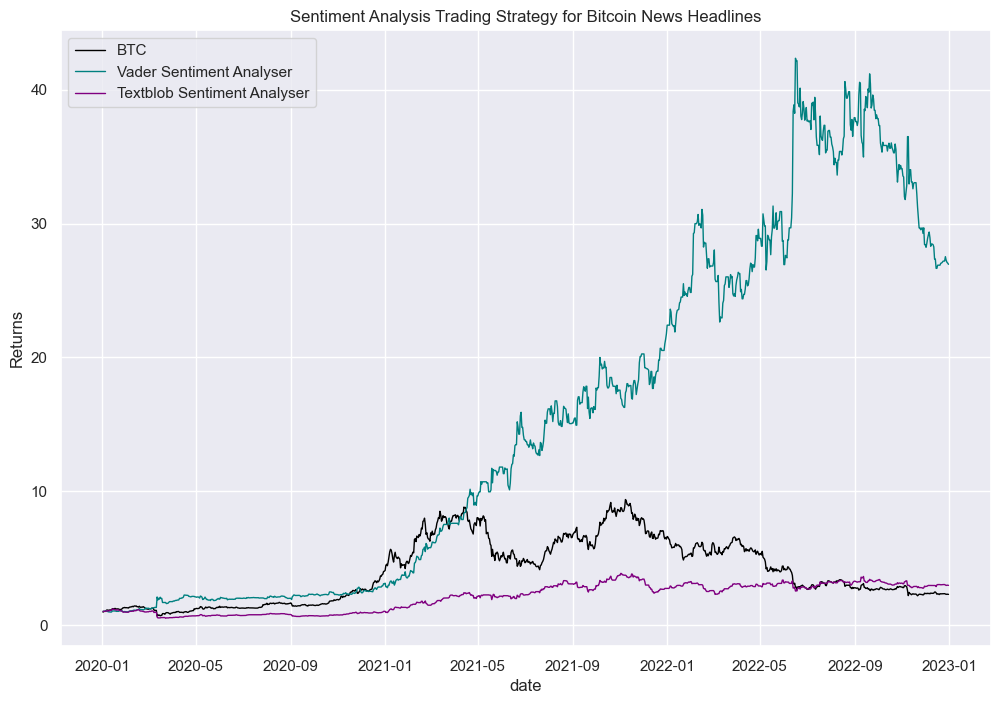

In [6]:
sentiment_analyser.plot_strat(df)